in this lab, we will explore a variety of activities using the "Exercise and Fitness Metrics" dataset, employing powerful Pandas techniques. Let's dive into the intriguing activities we will cover:

Discretization and Binning: Utilizing pd.cut and pd.qcut, we will categorize continuous variables into bins or quantiles. By grouping the data into predefined ranges, we can analyze the distribution of exercise-related metrics and investigate potential correlations with other variables.

Creating Binary Indicators: Leveraging pd.get_dummies, we will generate binary indicators for different types present in each categorical column. This technique is particularly useful when we want to represent categorical data in a format suitable for analysis or modeling.

In [1]:
# to read the dataframe
import pandas as pd
# For mathematical calculations
import numpy as np

# Reading the dataset as a dataframe

In [2]:
# Reading dataframes
exercises_df = pd.read_csv('exercise_dataset.csv')

In [3]:
exercises_df.head()


,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


# Discovering the dataset

In [4]:
#show the number of cells in the dataframe
print("exercises dataframe size: ", exercises_df.size)

#show the number of records (rows) in the dataframe
print("number of exercises: ", len(exercises_df))

exercises dataframe size:  46368
number of exercises:  3864


In [5]:
exercises_df.dtypes

ID                      int64
Exercise               object
Calories Burn         float64
Dream Weight          float64
Actual Weight         float64
Age                     int64
Gender                 object
Duration                int64
Heart Rate              int64
BMI                   float64
Weather Conditions     object
Exercise Intensity      int64
dtype: object

In [6]:
exercises_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


Classify age into categories

In [7]:
#To analyze exercise habits across different age groups, we need to categorize the Age column into meaningful groups. Create three age categories:

#Young: 0-30
#Adult: 30-60
#Senior: above 60
exercises_df['AgeGroup'] = pd.cut(exercises_df['Age'], bins=[0, 30, 60, 100], labels=["Young", "Adult", "Senior"])
exercises_df['AgeGroup']

0       Adult
1       Young
2       Young
3       Adult
4       Young
        ...  
3859    Young
3860    Young
3861    Adult
3862    Adult
3863    Adult
Name: AgeGroup, Length: 3864, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Senior']

Categorize Actual Weight into Weight Categories

In [9]:
 #To analyze exercise habits across different weight ranges, we need to categorize the Actual Weight into meaningful groups. Create three weight categories:

#Lightweight: 0-60
#Normal Weight: 60-80
#Overweight: above 80

exercises_df['WeightCategory'] = pd.cut(exercises_df['Actual Weight'], 
                                        bins=[0, 60, 80, np.inf], 
                                        labels=["Lightweight", "Normal Weight", "Overweight"])

exercises_df['WeightCategory'] 

#p.inf is used to indicate infinity, in this case any value above 80. Using this instead of a hard number like 200 ensures the solution is robust against future data varia

0          Overweight
1       Normal Weight
2       Normal Weight
3          Overweight
4          Overweight
            ...      
3859       Overweight
3860       Overweight
3861       Overweight
3862    Normal Weight
3863      Lightweight
Name: WeightCategory, Length: 3864, dtype: category
Categories (3, object): ['Lightweight' < 'Normal Weight' < 'Overweight']

Categorize Exercise Durations into Meaningful Groups
we want to categorize exercise durations into three meaningful groups: Sedentary, Moderate, and Active. By doing this, we can analyze exercise habits across different duration ranges such as 0, 25, 50, and inf.

Here are the steps to complete the task:

Create a new column named ExerciseLevel. Categorize each exercise duration according to the following ranges:

Sedentary: duration less than 25 minutes. Moderate: duration between 25 and 50 minutes (inclusive). Active: duration greater than 50 minutes. Store the categorization result in the ExerciseLevel column.

In [10]:
exercises_df['ExerciseLevel'] = pd.cut(exercises_df['Duration'], bins=[0, 25, 50,  np.inf], labels=["Sedentary", "Moderate", "Active"])
exercises_df['ExerciseLevel']

0        Moderate
1        Moderate
2       Sedentary
3        Moderate
4        Moderate
          ...    
3859    Sedentary
3860     Moderate
3861       Active
3862       Active
3863    Sedentary
Name: ExerciseLevel, Length: 3864, dtype: category
Categories (3, object): ['Sedentary' < 'Moderate' < 'Active']

Generate Gender dummy variables with a colon separator

In [11]:
#Generate dummy variables for the Gender column and store the result in the variable gender_dummies. Each variable should be prefixed with Gender using a colon : separator.


In [12]:
gender_dummies = pd.get_dummies(exercises_df['Gender'], prefix='Gender', prefix_sep=':')
gender_dummies  #Using pd.get_dummies() method with the mentioned prefix & prefix separator:

,Gender:Female,Gender:Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
3859,1,0
3860,1,0
3861,0,1
3862,1,0


Create Dummy Variables for Weather Conditions Column and Drop First Categorical Level


Create dummy variables for the "Weather Conditions" column. Each variable should be prefixed with "Weather:" and separated by a colon ":". Make sure to drop the first categorical level, but keep it as a level if the row has 0 in all categorical levels. Store the resulting dummy variables in the variable Weather_dummies.

In [13]:
#Using pd.get_dummies() method with the mentioned prefix & prefix separator with setting drop_first parameter to True:

Weather_dummies = pd.get_dummies(exercises_df['Weather Conditions'], prefix='Weather', prefix_sep=':', drop_first=True)
Weather_dummies

,Weather:Rainy,Weather:Sunny
0,1,0
1,1,0
2,0,0
3,0,1
4,0,0
...,...,...
3859,0,0
3860,1,0
3861,1,0
3862,1,0


Categorize Exercises by Intensity Level


Create a new column called ExerciseIntensityCategory to categorize the exercises into four intensity levels: "Low Intensity" (0-0.25), "Medium Intensity" (0.25-0.50), "Above-Medium Intensity" (0.50-0.75), "High Intensity" (0.75-1) based on their exercise intensity values. Assign each exercise to an appropriate intensity level using the quantiles 0, 0.25, 0.5, 0.75, and 1.

In [14]:
exercises_df['ExerciseIntensityCategory'] = pd.qcut(exercises_df['Exercise Intensity'], q=[0, .25, .5, .75, 1], labels=["Low Intensity", "Medium Intensity", "Above-Medium Intensity", "High Intensity"])
exercises_df['ExerciseIntensityCategory'] 

0             Medium Intensity
1             Medium Intensity
2             Medium Intensity
3               High Intensity
4                Low Intensity
                 ...          
3859    Above-Medium Intensity
3860          Medium Intensity
3861            High Intensity
3862             Low Intensity
3863             Low Intensity
Name: ExerciseIntensityCategory, Length: 3864, dtype: category
Categories (4, object): ['Low Intensity' < 'Medium Intensity' < 'Above-Medium Intensity' < 'High Intensity']

Categorize Exercises by Calorie Burn Level


Create a new column called CalorieBurnCategory and assign each exercise to one of three categories based on the CaloriesBurn column: Low Calorie Burn: exercises with a low calorie burn rate Moderate Calorie Burn: exercises with a moderate calorie burn rate High Calorie Burn: exercises with a high calorie burn rate You should use 3 quantiles to determine the category boundaries. Store the category labels in the calorie_burn_bin_edges variable.

In [15]:
exercises_df['CalorieBurnCategory'], calorie_burn_bin_edges = pd.qcut(exercises_df['Calories Burn'], q=3, labels=["Low Calorie Burn", "Moderate Calorie Burn", "High Calorie Burn"], retbins=True)
exercises_df['CalorieBurnCategory'], calorie_burn_bin_edges

(0       Moderate Calorie Burn
 1       Moderate Calorie Burn
 2       Moderate Calorie Burn
 3            Low Calorie Burn
 4           High Calorie Burn
                 ...          
 3859         Low Calorie Burn
 3860        High Calorie Burn
 3861    Moderate Calorie Burn
 3862         Low Calorie Burn
 3863         Low Calorie Burn
 Name: CalorieBurnCategory, Length: 3864, dtype: category
 Categories (3, object): ['Low Calorie Burn' < 'Moderate Calorie Burn' < 'High Calorie Burn'],
 array([100.0094034 , 235.88890447, 369.18279033, 499.8592625 ]))

Categorize exercises into BMI categories with 3 quantiles


Create a new column called BMICategory to categorize exercises as Underweight, Normal Weight, or Overweight based on their BMI. Use 3 quantiles to define the categories. Store the bin edges in the variable bmi_bin_edges.

In [16]:
exercises_df['BMICategory'], bmi_bin_edges = pd.qcut(exercises_df['BMI'], q=3, labels=["Underweight", "Normal Weight", "Overweight"], retbins=True)
exercises_df['BMICategory'], bmi_bin_edges

(0       Normal Weight
 1         Underweight
 2       Normal Weight
 3          Overweight
 4         Underweight
             ...      
 3859       Overweight
 3860    Normal Weight
 3861       Overweight
 3862      Underweight
 3863       Overweight
 Name: BMICategory, Length: 3864, dtype: category
 Categories (3, object): ['Underweight' < 'Normal Weight' < 'Overweight'],
 array([18.50001378, 24.1056762 , 29.56966931, 34.99663922]))

Categorize Exercises by Intensity

Create a new column called HeartRateZone and categorize the exercises based on their Heart rate into the Resting Zone,Fat-Burning Zone, or Cardio Zone. Use three quantiles to define the categories. Store the bin edges in the variable heart_rate_bin_edges

In [17]:
exercises_df['HeartRateZone'], heart_rate_bin_edges = pd.qcut(exercises_df['Heart Rate'], q=3, labels=["Resting Zone", "Fat-Burning Zone", "Cardio Zone"], retbins=True)
exercises_df['HeartRateZone'], heart_rate_bin_edges 

(0            Cardio Zone
 1       Fat-Burning Zone
 2       Fat-Burning Zone
 3            Cardio Zone
 4           Resting Zone
               ...       
 3859    Fat-Burning Zone
 3860         Cardio Zone
 3861         Cardio Zone
 3862    Fat-Burning Zone
 3863    Fat-Burning Zone
 Name: HeartRateZone, Length: 3864, dtype: category
 Categories (3, object): ['Resting Zone' < 'Fat-Burning Zone' < 'Cardio Zone'],
 array([100., 126., 153., 180.]))

Analyze the relationship between BMI and exercise intensity or fitness metrics and calculate average Exercise Intensity for each BMICategory


Calculate the average Exercise Intensity for each BMICategory and store the result in the variable bmi_exercise_frequency. This analysis will help us understand the relationship between BMI and exercise intensity or fitness metrics.

In [18]:
#Using groupby() method on the BMICategory column and taking average of Exercise Intensity using .mean() method:
bmi_exercise_frequency = exercises_df.groupby('BMICategory')['Exercise Intensity'].mean()
bmi_exercise_frequency 

BMICategory
Underweight      5.471273
Normal Weight    5.552795
Overweight       5.347826
Name: Exercise Intensity, dtype: float64

Create a grouped bar chart to visualize the relation between CalorieBurnCategory & Exercise

Store the resulting chart in the variable calories_exercises_count_chart & the grouped data in the variable exercises_count_data.

In [19]:
#Using .groupby() method on 'CalorieBurnCategory' & 'Exercise' columns:
exercises_count_data = exercises_df.groupby(['CalorieBurnCategory', 'Exercise']).size().unstack()
exercises_count_data 

Exercise,Exercise 1,Exercise 10,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9
CalorieBurnCategory,,,,,,,,,,
Low Calorie Burn,143,143,107,143,106,131,127,127,134,127
Moderate Calorie Burn,139,128,144,118,131,126,126,112,143,121
High Calorie Burn,121,127,94,124,134,147,128,147,120,146


<Axes: xlabel='CalorieBurnCategory'>

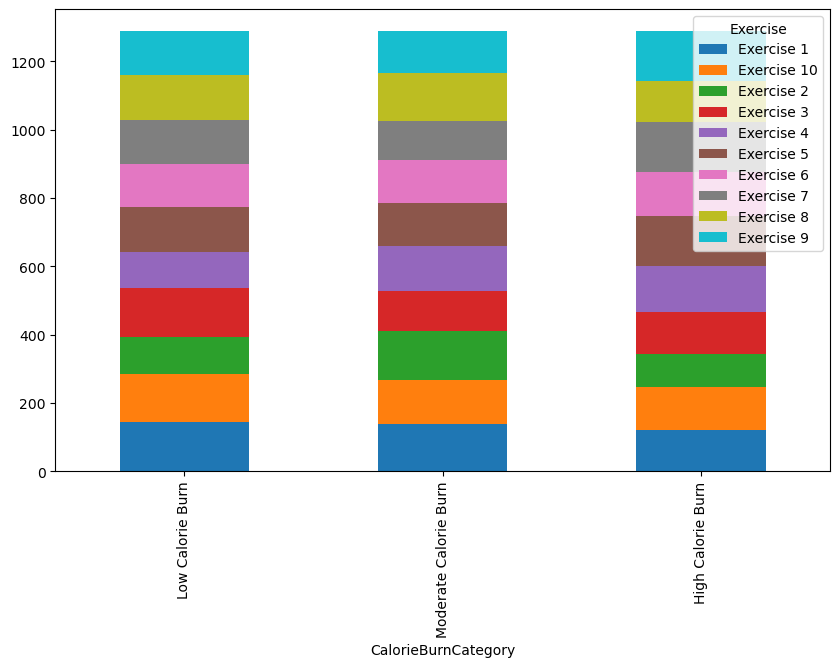

In [20]:
#Using this grouped data in the .plot() method to create the bar chart with setting the stacked parameter to True with a figure size of (10, 6):

calories_exercises_count_chart = exercises_count_data.plot(kind='bar', stacked=True, figsize=(10, 6))
calories_exercises_count_chart 